In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model

In [4]:
df=pd.read_csv("./gemini_BTCUSD_day.csv")

In [5]:
df.head

<bound method NDFrame.head of                   Date  Symbol      Open  ...       Low     Close       Volume
0     08-10-2015 04:00  BTCUSD      0.00  ...      0.00    243.60    34.754703
1     09-10-2015 04:00  BTCUSD    243.60  ...    243.60    245.51    61.587068
2     10-10-2015 04:00  BTCUSD    245.51  ...    244.60    246.30    30.870549
3     11-10-2015 04:00  BTCUSD    246.30  ...    245.96    248.98    22.747091
4     12-10-2015 04:00  BTCUSD    248.98  ...    245.75    245.75    71.047743
...                ...     ...       ...  ...       ...       ...          ...
2037  06-05-2021 04:00  BTCUSD  56900.44  ...  55200.00  55762.28  1494.897855
2038  07-05-2021 04:00  BTCUSD  55762.28  ...  55292.22  58187.76  1591.200547
2039  08-05-2021 04:00  BTCUSD  58187.76  ...  57583.09  58545.16  1692.076680
2040  09-05-2021 04:00  BTCUSD  58545.16  ...  56275.13  59407.78  1710.375935
2041  10-05-2021 04:00  BTCUSD  59407.78  ...  53434.31  55696.01  2206.490182

[2042 rows x 7 column

In [6]:
del df['Date']
del df['Symbol']

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,0.00,245.00,0.00,243.60,34.754703
1,243.60,249.97,243.60,245.51,61.587068
2,245.51,246.30,244.60,246.30,30.870549
3,246.30,249.50,245.96,248.98,22.747091
4,248.98,248.98,245.75,245.75,71.047743


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2042 non-null   float64
 1   High    2042 non-null   float64
 2   Low     2042 non-null   float64
 3   Close   2042 non-null   float64
 4   Volume  2042 non-null   float64
dtypes: float64(5)
memory usage: 79.9 KB


In [9]:
df.describe()

,Open,High,Low,Close,Volume
count,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000
mean,8561.651773,8837.150305,8279.614647,8588.857561,3458.185883
std,11681.263939,12082.504260,11252.597488,11726.184537,4108.326925
min,0.000000,245.000000,0.000000,243.600000,0.000000
25%,1062.882500,1092.900000,1036.675000,1068.575000,1104.014615
50%,6434.785000,6574.005000,6341.110000,6439.125000,2098.158879
75%,9576.095000,9783.575000,9290.000000,9581.242500,4130.832240
max,63773.180000,64900.000000,62045.000000,63773.180000,54142.433520


In [10]:
df.columns.values

array(['Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [11]:
df.shape

(2042, 5)

In [12]:
n_train_rows = int(df.shape[0]*.8)-1

In [13]:
train = df.iloc[:n_train_rows, :]
test = df.iloc[n_train_rows:, :]

In [14]:
print(train.shape)
print(test.shape)

(1632, 5)
(410, 5)


In [15]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train.values)
test_set_scaled = sc.fit_transform(test.values)

In [16]:
steps = 50
x_train = []
y_train = []
x_test = []
y_test = []

In [17]:
for i in range(steps, training_set_scaled.shape[0]-steps):
    x_train.append(training_set_scaled[i-steps:i, :])
    y_train.append(training_set_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(1532, 50, 5)


In [18]:
for i in range(steps, test_set_scaled.shape[0]):
    x_test.append(test_set_scaled[i-steps:i, :])
    y_test.append(test_set_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(360, 50, 5)


In [19]:
x_train.shape

(1532, 50, 5)

In [20]:
m = Sequential()

In [21]:
m.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f13485276d0>>

In [22]:
epochs = 10

m.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],5)))
m.add(Dropout(0.2))
m.add(LSTM(units=50, return_sequences = True))
m.add(Dropout(0.2))
m.add(LSTM(units=50, return_sequences = True))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=5))
m.compile(loss="mse", optimizer="adam")
m.fit(x_train, y_train, batch_size = 32, epochs = epochs)
m.summary

Epoch 1/10
48/48 [==============================] - 12s 104ms/step - loss: 0.0131
Epoch 2/10
48/48 [==============================] - 5s 103ms/step - loss: 0.0058
Epoch 3/10
48/48 [==============================] - 5s 104ms/step - loss: 0.0047
Epoch 4/10
48/48 [==============================] - 5s 105ms/step - loss: 0.0049
Epoch 5/10
48/48 [==============================] - 5s 105ms/step - loss: 0.0038
Epoch 6/10
48/48 [==============================] - 5s 102ms/step - loss: 0.0037
Epoch 7/10
48/48 [==============================] - 5s 104ms/step - loss: 0.0034
Epoch 8/10
48/48 [==============================] - 5s 103ms/step - loss: 0.0035
Epoch 9/10
48/48 [==============================] - 5s 102ms/step - loss: 0.0030
Epoch 10/10
48/48 [==============================] - 5s 103ms/step - loss: 0.0031


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f13485276d0>>

In [23]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [24]:
results = m.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)

12/12 [==============================] - 2s 26ms/step - loss: 0.0055
test loss, test acc: 0.0055393679067492485


In [27]:
y_pred = m.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

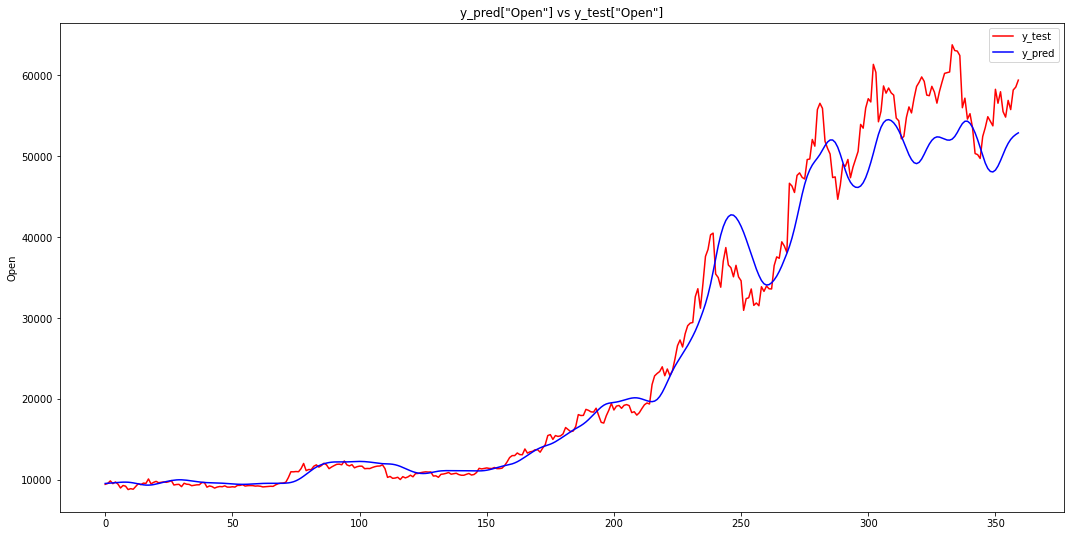

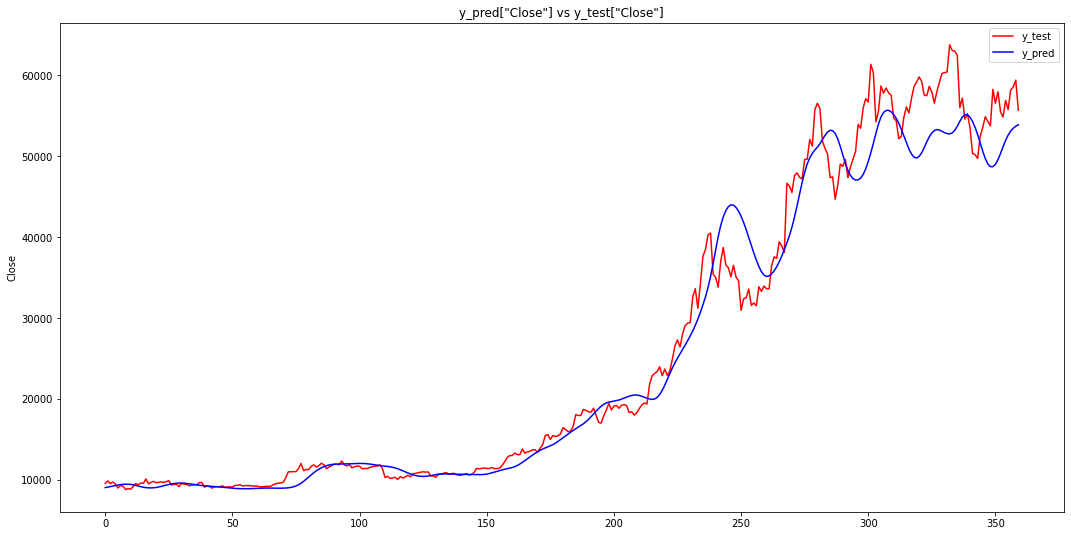

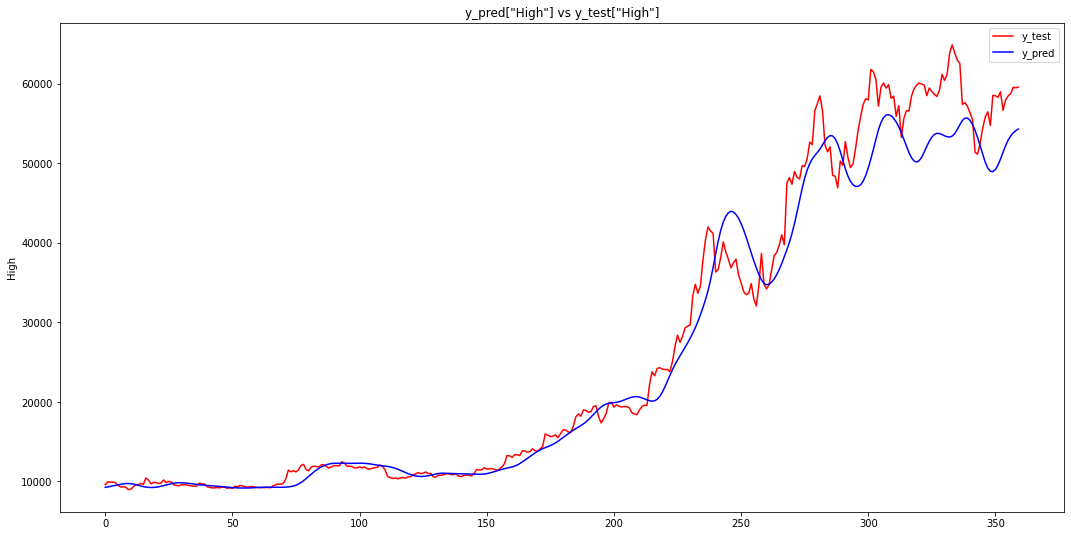

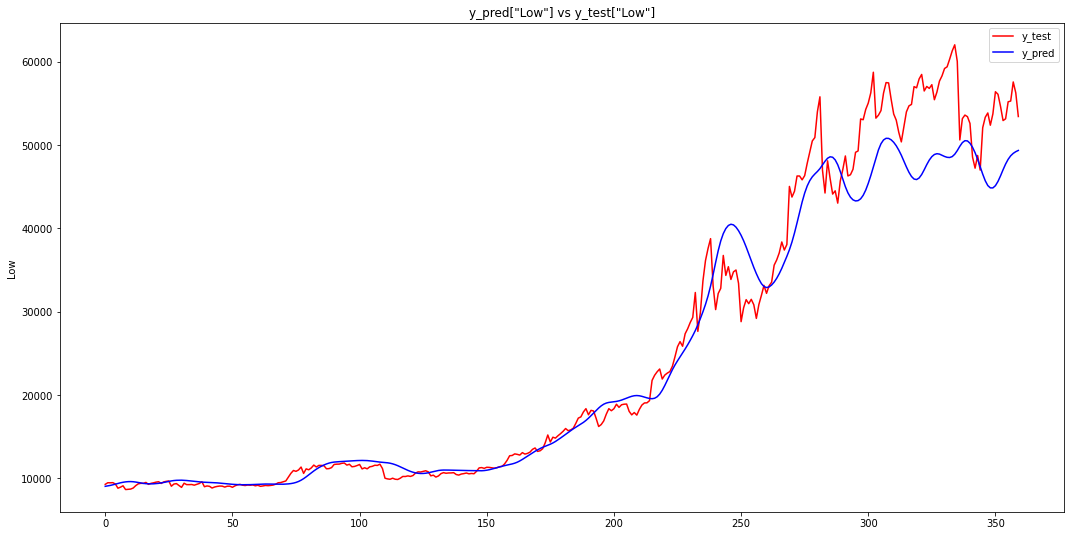

In [28]:
y_test = test[steps:].reset_index()


plt.figure(figsize = (18,9))
plt.plot(y_test['Open'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,0], color = 'blue', label = 'y_pred')
plt.title('y_pred["Open"] vs y_test["Open"]')
plt.ylabel('Open')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,3], color = 'blue', label = 'y_pred')
plt.title('y_pred["Close"] vs y_test["Close"]')
plt.ylabel('Close')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['High'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,1], color = 'blue', label = 'y_pred')
plt.title('y_pred["High"] vs y_test["High"]')
plt.ylabel('High')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['Low'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,2], color = 'blue', label = 'y_pred')
plt.title('y_pred["Low"] vs y_test["Low"]')
plt.ylabel('Low')
plt.legend()
plt.show()